# DBSCAN Algorithm, from Theory to Practice

#### Basic imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style='darkgrid', rc={'axes.linewidth':1, 'axes.edgecolor':'black'})

## Introduction: density-based clustering

#### About DBSCAN:

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.
- Source: Wikipedia

Data preparation:
- The data has to be at a numeric form (use One-Hot-Encoding for categorical variables)
- The algorithm can't handle null values (use one of the methods to handle missing values)
- The data has to be scaled (use the StandardScaler from sklearn).

DBSCAN Algorithm:
- eps: short form of epsilon, determines the search radius (in euclidean distance) extending from each observation. Hence, the data has to be scaled.
- min_samples: the criterion that determines if an observation is defined as base, border or outlier.
  - Base point: data point which has equal or more than n observations('min_samples') in it radius ('eps').
  - Border point: data point which has less than n observations in it radius, but at least one of them is classified as 'Base point'.
  - Outlier: data point which has less than n observations in it radius, and neither one of them is classified as 'Base point'.

#### Creating random dataset:

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
values,centers = make_blobs(n_samples=1000, centers=[[0,3],[1,2],[1,1],[1,1],[3,4],[4,1],[5,2],[5,2],[5,2],[5,2]], cluster_std=0.5, random_state=101)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(values)

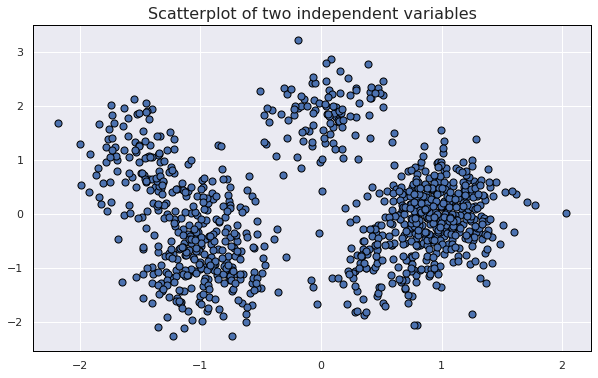

In [4]:
plt.figure(figsize=(10,6))
plt.title("Scatterplot of two independent variables", fontsize=16)

sns.scatterplot(x=scaled_values[:,0], y=scaled_values[:,1], #c=centers,
                cmap='Blues', edgecolor='black', linewidth=1, s=50)
plt.show()

### Implementation of DBSCAN on the dataset

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=50)
outliers = dbscan.fit_predict(scaled_values)

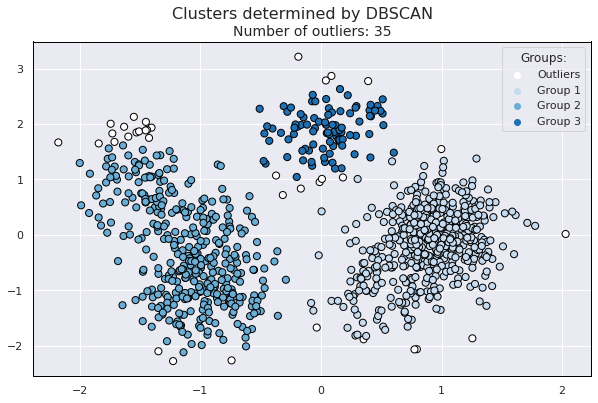

In [7]:
plt.figure(figsize=(10,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Clusters determined by DBSCAN', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.scatterplot(x=scaled_values[:,0], y=scaled_values[:,1], hue=outliers,
                palette=cust_palette, edgecolor='black', linewidth=1, s=50)

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')
plt.show()

Increasing the 'min_samples':

In [8]:
dbscan = DBSCAN(eps=0.5, min_samples=75)
outliers = dbscan.fit_predict(scaled_values)

May cause smaller cluster to become outliers or decrease the size of current clusters.

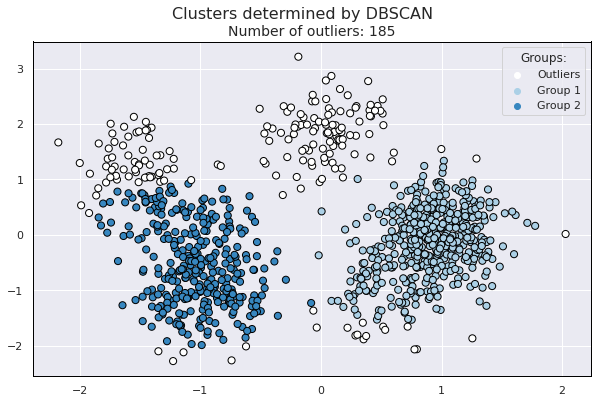

In [9]:
plt.figure(figsize=(10,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Clusters determined by DBSCAN', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.scatterplot(x=scaled_values[:,0], y=scaled_values[:,1], hue=outliers,
                palette=cust_palette, edgecolor='black', linewidth=1, s=50)

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')
plt.show()

Decreasing the 'eps':

In [10]:
dbscan = DBSCAN(eps=0.3, min_samples=50)
outliers = dbscan.fit_predict(scaled_values)

Increasing the noise sensitivity, may cause less dense groups to become outliers or decrease the size of current clusters.

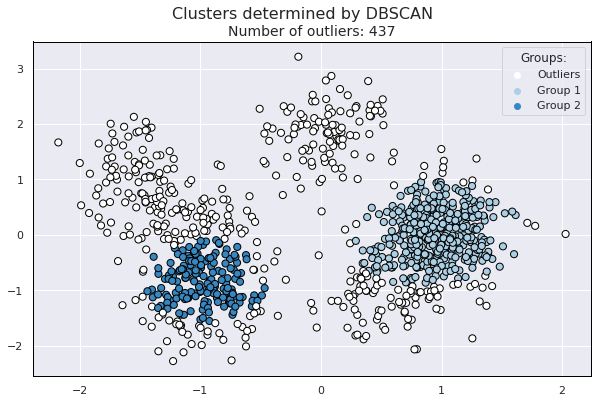

In [11]:
plt.figure(figsize=(10,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Clusters determined by DBSCAN', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.scatterplot(x=scaled_values[:,0], y=scaled_values[:,1], hue=outliers,
                palette=cust_palette, edgecolor='black', linewidth=1, s=50)

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')
plt.show()

## Implementation of DBSCAN on a real dataset

Let's use the famous titanic dataset
- Source: https://www.kaggle.com/c/titanic

In [12]:
df = pd.read_csv('titanic dataset.csv')

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Clustering in One Dimension

Let's take the 'Fare' variable, which determines how much each passenger payed for their ticket, and find the outliers using DBSCAN

In [15]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df['Fare'].values.reshape(-1,1))

Just by looking at the scaled values, it is possible to guesstimate how the default 'eps' of 0.5 will affect the clustering.

In [16]:
print(f'Min: {round(scaled_values.min(),2)}')
print(f'Median: {round(np.median(scaled_values),2)}')
print(f'Max: {round(scaled_values.max(),2)}')

Min: -0.65
Median: -0.36
Max: 9.67


It is wise to limit the minimum samples to around 10% of the observations (around 900), because it is not recommended to create very small clusters (groups).

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=90) 
outliers = dbscan.fit_predict(scaled_values)

Awesome! we can see how all of the tickets above $100 marked as outliers!

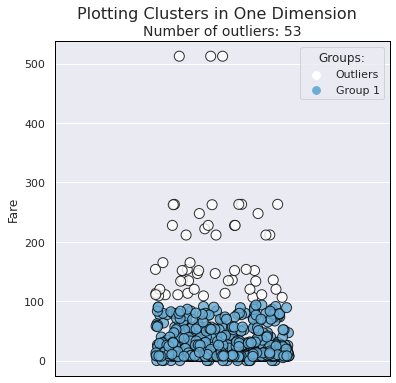

In [18]:
plt.figure(figsize=(6,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Plotting Clusters in One Dimension', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.stripplot(data=df, y='Fare',x=['']*len(df['Fare']), hue=outliers, jitter=0.2,
                palette=cust_palette, edgecolor='black', linewidth=1, s=10, alpha=0.8)

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')

plt.show()

Too many outliers? Too little clusters?
Adjust the eps or the minimum samples if nessesary.

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=10) 
outliers = dbscan.fit_predict(scaled_values)

This way, we get three clusters:
- group 1 of most of the tickets
- group 2 of expensive tickets
-  3 outliers (extremly expensive tickets).

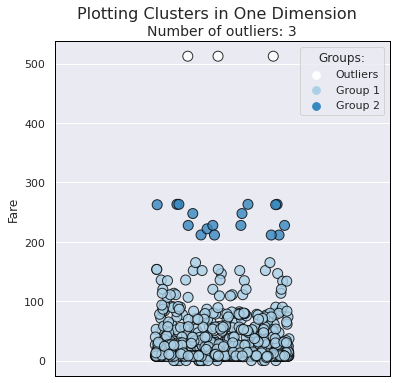

In [20]:
plt.figure(figsize=(6,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Plotting Clusters in One Dimension', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.stripplot(data=df, y='Fare',x=['']*len(df['Fare']), hue=outliers, jitter=0.2,
                palette=cust_palette, edgecolor='black', linewidth=1, s=10, alpha=0.8)

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')

plt.show()

DBSCAN is great for dealing with outliers and also for clustering and finding patterns in the data! 

It may be wise to drop those three extremly pricy tickets (the outliers), but they will be valuable for the rest of the demonstration.

In [21]:
df['DBSCAN Group'] = outliers
df['DBSCAN Group'].unique()

array([ 0,  1, -1])

In [22]:
df[df['DBSCAN Group'] == -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DBSCAN Group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,-1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,-1


In [23]:
# df.drop(index=df[df['DBSCAN Group'] == -1].index, inplace=True)
# df.reset_index(drop=True)

#### Clustering in Two Dimensions

Let's add another dimension, with the variable 'Pclass' (which determines in which class the passenger stayed - first, second or third)

In [24]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Fare','Pclass']].values)

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=10) 
outliers = dbscan.fit_predict(scaled_values)

If we stick with small criterion for minimum samples (10), we get five clusters:
- group 1 of third-class tickets
- group 2 of the rest of the first-class tickets
- group 3 of second-class tickets
- group 4 of expensive tickets from first-class
- 3 outliers (extremly expensive first class tickets)

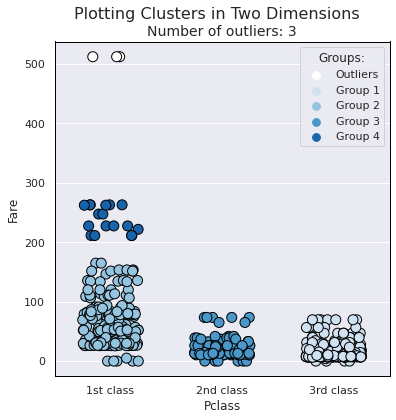

In [26]:
plt.figure(figsize=(6,6))

plt.subplots_adjust(top=0.9)
plt.suptitle('Plotting Clusters in Two Dimensions', fontsize=16)
plt.title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
cust_palette = [(1,1,1)] + sns.color_palette('Blues',len(np.unique(dbscan.labels_))-1)

g = sns.stripplot(data=df, y='Fare',x='Pclass', hue=outliers, jitter=0.25,
                palette=cust_palette, edgecolor='black', linewidth=1, s=10)

g.set_xticklabels(['1st class','2nd class','3rd class'])

handles,labels = g.get_legend_handles_labels()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:')

plt.show()

#### Clustering in Three Dimensions

Let's go further and look at a three dimensional space, adding the 'Sex' variable. As mentioned, DBSCAN can take only numeric variables, therefore it is nessesary to transform the 'Sex' column to numbers.

In [27]:
df['Sex'] = df['Sex'].apply(lambda sex: 1 if sex == 'male' else 0)

In [28]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Fare','Pclass','Sex']].values)

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=10) 
outliers = dbscan.fit_predict(scaled_values)

More groups! (seven clusters):
- 6 groups of Males and Females in each class
- 25 outliers (expensive tickets in some of the groups)

In [30]:
from mpl_toolkits import mplot3d

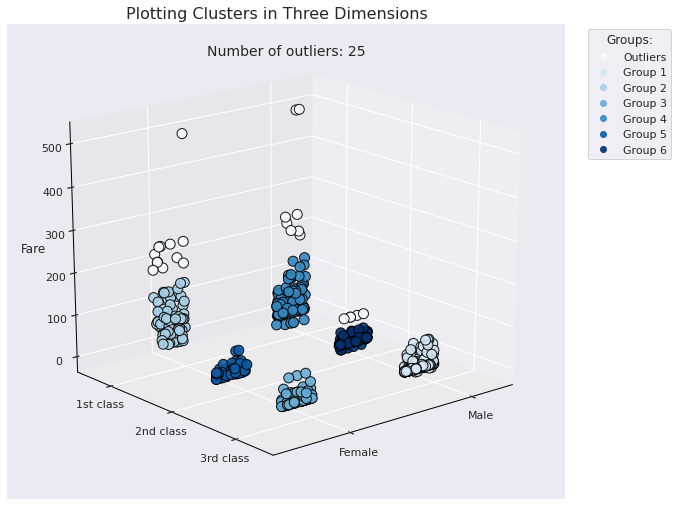

In [31]:
plt.figure(figsize=(10,8))

plt.subplots_adjust(top=0.95)
plt.suptitle('Plotting Clusters in Three Dimensions', fontsize=16)

ax = plt.axes(projection='3d')
ax.view_init(20, 50), ax.invert_xaxis()

ax.set_title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
ax.set_xticks([0,1]), ax.set_xmargin(m=0.25), ax.set_xticklabels(['Female','Male'])
ax.set_yticks([1,2,3]), ax.set_ymargin(m=0.25), ax.set_yticklabels(['1st class','2nd class','3rd class'])
ax.set_zlabel('Fare')

g = ax.scatter(df['Sex']-0.25*np.random.rand(len(df['Sex'])), df['Pclass'], df['Fare'], c=outliers,
               cmap='Blues', s=100, edgecolor='black', linewidth=1, depthshade=0, alpha=0.9)

handles, labels = g.legend_elements()
plt.legend([handles[i] for i in range(len(handles))],['Outliers']+['Group '+str(i) for i in range(1,len(labels))],title='Groups:',
           bbox_to_anchor=(0,0,1.2,1))
plt.show()

#### Clustering in Higher Dimensions

After three dimensions it is getting kind of impossible to plot and explore the clusters. Let's try to add the variable 'SibSp' which stands for the number of Siblings and Spouse on board.

In [32]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Fare','Pclass','Sex','SibSp']].values)

In [33]:
dbscan = DBSCAN(eps=0.5, min_samples=10) 
outliers = dbscan.fit_predict(scaled_values)

In [34]:
df['DBSCAN Group'] = outliers

Too messy.

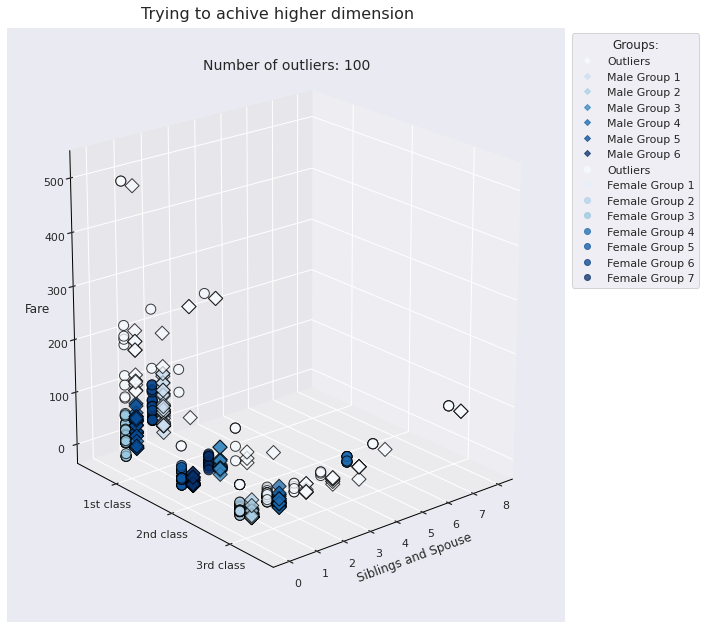

In [35]:
plt.figure(figsize=(10,10))

plt.subplots_adjust(top=0.95)
plt.suptitle('Trying to achive higher dimension', fontsize=16)

ax = plt.axes(projection='3d')
ax.view_init(20, 50), ax.invert_xaxis()

ax.set_title(f'Number of outliers: {dbscan.labels_[dbscan.labels_ == -1].size}', fontsize=14)
ax.set_xlabel('Siblings and Spouse')
ax.set_yticks([1,2,3]), ax.set_ymargin(m=0.25), ax.set_yticklabels(['1st class','2nd class','3rd class'])
ax.set_zlabel('Fare')

m = ax.scatter(df[df['Sex']==0]['SibSp'], df[df['Sex']==0]['Pclass']+0.1, df[df['Sex']==0]['Fare'], c=df[df['Sex']==0]['DBSCAN Group'],
               s=100, cmap='Blues', edgecolor='black', linewidth=1, marker='D', depthshade=0, alpha=0.75)
f = ax.scatter(df[df['Sex']==1]['SibSp'], df[df['Sex']==1]['Pclass']-0.1, df[df['Sex']==1]['Fare'], c=df[df['Sex']==1]['DBSCAN Group'],
               s=100, cmap='Blues', edgecolor='black', linewidth=1, marker='o', depthshade=0, alpha=0.75)

handles_m, labels_m = m.legend_elements()
handles_f, labels_f = f.legend_elements()

plt.legend([handles_m[i] for i in range(len(handles_m))]+[handles_f[i] for i in range(len(handles_f))],
           ['Outliers']+['Male Group '+str(i) for i in range(1,len(labels_m))]+['Outliers']+['Female Group '+str(i) for i in range(1,len(labels_f))],
           title='Groups:', bbox_to_anchor=(0,0,1.25,1))
plt.show()

The more dimensions, the more clusters that will form with the same setting of 'eps' and 'min_samples', i.e. additional variables will seperate our data into a smaller groups.

#### DBSCAN in higher dimensions

In [36]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['Survived','Fare','Pclass','SibSp','Parch','Sex']].values)

Let's go back and limit the group size again to 10% percent of the data, very small groups (clusters) are often meaningless.

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=90)
outliers = dbscan.fit_predict(scaled_values)

Add the clusters to the DataFrame for further use

In [38]:
df['DBSCAN Group'] = outliers

Only two clusters - one group and outliers

In [39]:
df['DBSCAN Group'].unique()

array([-1,  0])

Let's examine the group:

In [40]:
df[df['DBSCAN Group']==0][['Survived','Fare','Pclass','SibSp','Parch','Sex']].head(20) # It is recommended to look at more rows

,Survived,Fare,Pclass,SibSp,Parch,Sex
4,0,8.0500,3,0,0,1
5,0,8.4583,3,0,0,1
12,0,8.0500,3,0,0,1
26,0,7.2250,3,0,0,1
29,0,7.8958,3,0,0,1
37,0,8.0500,3,0,0,1
42,0,7.8958,3,0,0,1
45,0,8.0500,3,0,0,1
51,0,7.8000,3,0,0,1
57,0,7.2292,3,0,0,1


In [41]:
df[df['DBSCAN Group']==0][['Survived','Fare','Pclass','SibSp','Parch','Sex']].describe()

,Survived,Fare,Pclass,SibSp,Parch,Sex
count,230.0,230.000000,230.0,230.0,230.0,230.0
mean,0.0,8.250702,3.0,0.0,0.0,1.0
std,0.0,2.589826,0.0,0.0,0.0,0.0
min,0.0,0.000000,3.0,0.0,0.0,1.0
25%,0.0,7.550000,3.0,0.0,0.0,1.0
50%,0.0,7.895800,3.0,0.0,0.0,1.0
75%,0.0,8.050000,3.0,0.0,0.0,1.0
max,0.0,24.150000,3.0,0.0,0.0,1.0


**Can you find the pattern?**
- Very large group of **230** male passengers which had a cheap ticket (mostly between 7.5 to 8 dollars) and traveld in third-class alone (without any sibilings, spouse, parents or children), unfortuntly died.
Always check if the data make sense, and if nessasary consult someone with domain knowledge.

**In summary:**
- Because there are more than three variables it is not possible to plot the group. Therefore, we won't be able to notice it with traditional exploratory data analysis (EDA).